## Get the data

In [1]:
import utils

URL_DATA = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
ROUTE_DATA='../data/raw'

utils.descargar_archivo(URL_DATA, ROUTE_DATA)


El archivo demographic_health_data.csv ya existe en la carpeta local.


In [2]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/media/tr4shhh/Tr4Shhh_FOLDER/Proyects/4geeks/15_Regresion_lineal_regularizada/regularized-linear-regression/data/raw/demographic_health_data.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

Files saved to /data/raw

In [3]:
import utils as ut

ut.ver_dataframe_columnas()

In [4]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

We have seen that we have too many columns to work with, so we are making a preselection to work more comfortably.

In [5]:
# Crear el archivo Markdown
nombre_archivo = '../docs/columns_names.md'

# Obtener los nombres de las columnas
nombres_columnas = df.columns.tolist()

# Imprimir los nombres de las columnas en el archivo Markdown
with open(nombre_archivo, 'w') as file:
    file.write(" | ".join(nombres_columnas))
    file.write("\n")
    file.write("|".join(['---'] * len(nombres_columnas)))
    file.write("\n")

After reading and informing ourselves about the columns, we tried to choose a target to predict using the data from the other columns.

I have decided to make a list with possible targets that interest me and see which one provides the most accurate prediction with my data.

In [6]:
targets_interesantes = ['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence' ]

And now I iterate through the SelectKBests to choose the number of best columns that we can use.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, f_regression
from sklearn.metrics import accuracy_score, r2_score
import warnings


categoricas = df.select_dtypes(include='object')

for c in categoricas:

    df[f'{c}_n'] = pd.factorize(df[c])[0]


all_numericas = df.select_dtypes(include='number')

#Bucle
#--------

for colum in targets_interesantes:

    target_column = colum 


    predictora = all_numericas.drop(target_column,axis=1)
    target = all_numericas[target_column]


    clasificador_escogido = f_regression
    modelo_escogido = LinearRegression()

    clasificacion = False

    # Tras este codigo tendremos una predictora 'X_selected' con las mejores
    #   columnas seleccionadas
    #-----------------

    print(f'Mejores predicciones para {colum}')


    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        accs = []
        percents = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
        for p in percents:

            k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * p))
            k_best.fit(predictora, target)

            # Guardamos las columnas con su nombre y su dataframe
            ix = k_best.get_support()
            train_sel = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])
            
            if clasificacion:

                # Definir el clasificador
                model = modelo_escogido
                model.fit(train_sel, target)
                y_pred = model.predict(train_sel)
                acc = accuracy_score(target, y_pred)
                accs.append(acc)

            else:

                # Definir el regresor
                model = modelo_escogido
                model.fit(train_sel, target)
                y_pred = model.predict(train_sel)
                acc = r2_score(target.values, y_pred)
                accs.append(acc)
            

        best_acc = accs.index(max(accs)) 
        print(f'The best k for selection is {percents[best_acc]}.')
        print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

        print(accs)

        # Guardamos el dataframe con las columnas escogidas
        k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * percents[best_acc]))
        k_best.fit(predictora.values, target.values)

        # Guardamos las columnas con su nombre y su dataframe
        ix = k_best.get_support()
        X_selected = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])


Mejores predicciones para anycondition_prevalence
The best k for selection is 1.
The best accuracy we get is 0.9999015.
[0.9999014973178157, 0.9999008607927028, 0.9999005456929945, 0.9999003243604372, 0.9999001381948321, 0.9998999094601335, 0.9998996072890606, 0.9998993181209583, 0.9998987012541384, 0.9998960834784792]
Mejores predicciones para Obesity_prevalence
The best k for selection is 0.9.
The best accuracy we get is 0.99985251.
[0.9998524689166892, 0.9998525071464127, 0.9998521532530418, 0.9998517495066529, 0.9998515671246067, 0.999851030662634, 0.999850470506211, 0.9998501322810418, 0.9998487001737966, 0.9998481850435168]
Mejores predicciones para Heart disease_prevalence
The best k for selection is 1.
The best accuracy we get is 0.99950038.
[0.9995003784696457, 0.9994997728722593, 0.9994988433832577, 0.9994971047663007, 0.9994960211823135, 0.9994936467486305, 0.9994921039901872, 0.9994897811237378, 0.9994873318024973, 0.9994712167527803]
Mejores predicciones para COPD_prevalen

We will stick with 'diabetes_prevalence' for our study and check how many columns we can retain without sacrificing accuracy.

The best k for selection is 1.
The best accuracy we get is 0.99977083.
[0.9997708265805764, 0.9997703077649132, 0.9997697354232968, 0.9997689359961287, 0.9997680947239426, 0.9997668898687188, 0.9997654929326018, 0.9997646693003173, 0.9997637627802182, 0.9997452666507706]


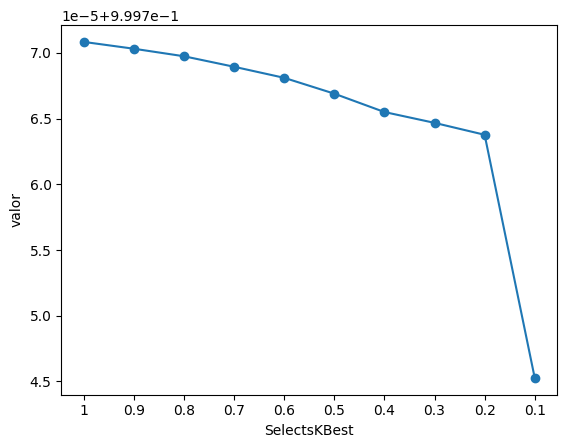

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, f_regression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import warnings


categoricas = df.select_dtypes(include='object')

for c in categoricas:

    df[f'{c}_n'] = pd.factorize(df[c])[0]


all_numericas = df.select_dtypes(include='number')


target_column =  'diabetes_prevalence'


predictora = all_numericas.drop(target_column,axis=1)
target = all_numericas[target_column]


clasificador_escogido = f_regression
modelo_escogido = LinearRegression()

clasificacion = False

# Tras este codigo tendremos una predictora 'X_selected' con las mejores
#   columnas seleccionadas
#-----------------

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    accs = []
    percents = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
    for p in percents:

        k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * p))
        k_best.fit(predictora, target)

        # Guardamos las columnas con su nombre y su dataframe
        ix = k_best.get_support()
        train_sel = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])
        
        if clasificacion:

            # Definir el clasificador
            model = modelo_escogido
            model.fit(train_sel, target)
            y_pred = model.predict(train_sel)
            acc = accuracy_score(target, y_pred)
            accs.append(acc)

        else:

            # Definir el regresor
            model = modelo_escogido
            model.fit(train_sel, target)
            y_pred = model.predict(train_sel)
            acc = r2_score(target.values, y_pred)
            accs.append(acc)
        

    best_acc = accs.index(max(accs)) 
    print(f'The best k for selection is {percents[best_acc]}.')
    print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

    print(accs)

    # Guardamos el dataframe con las columnas escogidas
    k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * percents[best_acc]))
    k_best.fit(predictora.values, target.values)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    X_selected = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])


    plt.plot(accs, marker='o', linestyle='-')

    plt.xticks(range(len(percents)), percents)
    plt.xlabel('SelectsKBest')
    plt.ylabel('valor')

    plt.show()



We see that we barely lose value, so we will stick with 30% of the columns.

In [9]:

target_column =  'diabetes_prevalence'


predictora = all_numericas.drop(target_column,axis=1)
target = all_numericas[target_column]


clasificador_escogido = f_regression
modelo_escogido = LinearRegression()

clasificacion = False


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    accs = []
    p = 0.3

    k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * p))
    k_best.fit(predictora, target)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    train_sel = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])
    
    if clasificacion:

        # Definir el clasificador
        model = modelo_escogido
        model.fit(train_sel, target)
        y_pred = model.predict(train_sel)
        acc = accuracy_score(target, y_pred)
        accs.append(acc)

    else:

        # Definir el regresor
        model = modelo_escogido
        model.fit(train_sel, target)
        y_pred = model.predict(train_sel)
        acc = r2_score(target.values, y_pred)
        accs.append(acc)
        

    best_acc = accs.index(max(accs)) 
    print(f'The best k for selection is {p}.')
    print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

    print(accs)

    # Guardamos el dataframe con las columnas escogidas
    k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * p))
    k_best.fit(predictora.values, target.values)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    X_selected = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])



The best k for selection is 0.3.
The best accuracy we get is 0.99976467.
[0.9997646693003173]


In [10]:
X_selected

,% White-alone,% Black-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI
0,76.725239,19.630942,9.6,11.3,32.6,27.7,13.8,19.3,19.5,59338.0,53628.0,65048.0,3.6,59338.0,119.0,47.6,45.4,49.4,35.8,34.2,37.3,7.9,7.2,8.7,8.6,7.3,9.9,11.9,13.8,3.1,2.9,3.3
1,87.285228,8.940382,10.3,9.7,27.6,31.3,9.8,13.9,13.1,57588.0,54437.0,60739.0,3.6,57588.0,115.5,40.2,38.2,42.3,29.7,28.4,31.0,7.8,7.0,8.7,8.6,7.2,10.1,11.0,13.1,3.2,3.0,3.5
2,49.069571,48.398376,12.9,27.0,35.7,12.2,30.9,43.9,36.7,34382.0,31157.0,37607.0,5.2,34382.0,68.9,57.5,55.6,59.1,40.7,39.5,41.9,11.0,10.1,11.8,12.1,10.7,13.3,18.6,20.6,4.5,4.2,4.8
3,76.834821,21.294643,11.4,16.8,47.3,11.5,21.8,27.8,26.3,46064.0,41283.0,50845.0,4.0,46064.0,92.3,51.6,49.6,53.4,38.7,37.4,40.2,8.6,7.9,9.3,10.0,8.8,11.3,13.2,14.9,3.3,3.1,3.6
4,95.878285,1.642462,11.4,19.8,34.0,12.6,13.2,18.0,15.5,50412.0,46157.0,54667.0,3.5,50412.0,101.1,46.3,44.3,48.4,34.0,32.4,35.5,9.2,8.4,10.1,10.5,9.1,12.0,12.6,14.5,3.4,3.2,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,93.835219,1.375113,7.0,9.0,33.3,22.0,8.4,10.0,8.5,73315.0,67141.0,79489.0,4.2,73315.0,117.8,40.3,38.5,42.2,33.6,32.1,35.1,5.9,5.4,6.4,6.6,5.7,7.7,8.3,9.6,2.6,2.4,2.8
3136,95.190850,0.758199,3.2,5.6,13.2,57.4,6.3,6.7,5.9,99087.0,88142.0,110032.0,3.0,99087.0,159.2,24.3,22.4,26.1,19.4,18.1,20.8,5.2,4.6,5.8,4.9,4.0,6.0,6.5,8.0,2.4,2.2,2.6
3137,95.354451,0.827627,7.2,7.2,40.1,15.4,10.0,12.1,10.6,63401.0,56812.0,69990.0,4.4,63401.0,101.8,42.2,40.0,44.2,34.2,32.5,35.7,7.2,6.5,7.9,8.0,7.0,9.2,9.5,11.2,3.0,2.8,3.2
3138,94.483196,0.507292,10.7,10.4,30.3,21.5,11.9,16.1,14.5,55190.0,49263.0,61117.0,4.2,55190.0,88.6,37.5,35.3,39.5,28.4,27.0,29.8,8.2,7.4,9.0,8.3,7.1,9.6,10.3,12.1,3.4,3.2,3.7


We save the selected columns in a CSV file.

In [18]:
target.column = 'target'

In [19]:
# A csv

result = pd.concat([X_selected, target], axis=1)


result.to_csv('../data/interim/demographic_best_columns.csv', index=False)


In [21]:
result

,% White-alone,% Black-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,target
0,76.725239,19.630942,9.6,11.3,32.6,27.7,13.8,19.3,19.5,59338.0,53628.0,65048.0,3.6,59338.0,119.0,47.6,45.4,49.4,35.8,34.2,37.3,7.9,7.2,8.7,8.6,7.3,9.9,11.9,13.8,3.1,2.9,3.3,12.9
1,87.285228,8.940382,10.3,9.7,27.6,31.3,9.8,13.9,13.1,57588.0,54437.0,60739.0,3.6,57588.0,115.5,40.2,38.2,42.3,29.7,28.4,31.0,7.8,7.0,8.7,8.6,7.2,10.1,11.0,13.1,3.2,3.0,3.5,12.0
2,49.069571,48.398376,12.9,27.0,35.7,12.2,30.9,43.9,36.7,34382.0,31157.0,37607.0,5.2,34382.0,68.9,57.5,55.6,59.1,40.7,39.5,41.9,11.0,10.1,11.8,12.1,10.7,13.3,18.6,20.6,4.5,4.2,4.8,19.7
3,76.834821,21.294643,11.4,16.8,47.3,11.5,21.8,27.8,26.3,46064.0,41283.0,50845.0,4.0,46064.0,92.3,51.6,49.6,53.4,38.7,37.4,40.2,8.6,7.9,9.3,10.0,8.8,11.3,13.2,14.9,3.3,3.1,3.6,14.1
4,95.878285,1.642462,11.4,19.8,34.0,12.6,13.2,18.0,15.5,50412.0,46157.0,54667.0,3.5,50412.0,101.1,46.3,44.3,48.4,34.0,32.4,35.5,9.2,8.4,10.1,10.5,9.1,12.0,12.6,14.5,3.4,3.2,3.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,93.835219,1.375113,7.0,9.0,33.3,22.0,8.4,10.0,8.5,73315.0,67141.0,79489.0,4.2,73315.0,117.8,40.3,38.5,42.2,33.6,32.1,35.1,5.9,5.4,6.4,6.6,5.7,7.7,8.3,9.6,2.6,2.4,2.8,8.9
3136,95.190850,0.758199,3.2,5.6,13.2,57.4,6.3,6.7,5.9,99087.0,88142.0,110032.0,3.0,99087.0,159.2,24.3,22.4,26.1,19.4,18.1,20.8,5.2,4.6,5.8,4.9,4.0,6.0,6.5,8.0,2.4,2.2,2.6,7.2
3137,95.354451,0.827627,7.2,7.2,40.1,15.4,10.0,12.1,10.6,63401.0,56812.0,69990.0,4.4,63401.0,101.8,42.2,40.0,44.2,34.2,32.5,35.7,7.2,6.5,7.9,8.0,7.0,9.2,9.5,11.2,3.0,2.8,3.2,10.4
3138,94.483196,0.507292,10.7,10.4,30.3,21.5,11.9,16.1,14.5,55190.0,49263.0,61117.0,4.2,55190.0,88.6,37.5,35.3,39.5,28.4,27.0,29.8,8.2,7.4,9.0,8.3,7.1,9.6,10.3,12.1,3.4,3.2,3.7,11.3


We check for duplicates.

In [20]:
#Encontrar duplicados

duplicados = df[df.duplicated(keep=False)]
duplicados

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_n,STATE_NAME_n


There are none, and we proceed with the next part of the project.

In [13]:
#Eliminar duplicados

# df_sin_duplicados = df.drop_duplicates(keep='first')